
<center><h1><b>7주차 ✅ Insurance Premium ML 2차</b></h1></center>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# 한글 폰트 패치.
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 경고문 처리
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('data/insurance/insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
X = df.drop('charges', axis=1)
X.head(2)

,age,sex,bmi,children,smoker,region
0,19,female,27.90,0,yes,southwest
1,18,male,33.77,1,no,southeast


In [6]:
y = df['charges']
y.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [7]:
X_ohe = pd.get_dummies(X)
X_ohe.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,0,0,1,0,0,0,1
1,18,33.77,1,0,1,1,0,0,0,1,0


In [3]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ohe)
X_scaled.shape

(1338, 11)

In [10]:
X_ohe.shape

(1338, 11)

In [11]:
X_ohe.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,0,0,1,0,0,0,1
1,18,33.77,1,0,1,1,0,0,0,1,0


In [12]:
pd.DataFrame(X_scaled)


,0,1,2,3,4,5,6,7,8,9,10
0,-1.438764,-0.453320,-0.908614,1.010519,-1.010519,-1.970587,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
1334,-1.509965,0.206139,-0.908614,1.010519,-1.010519,0.507463,-0.507463,1.769076,-0.566418,-0.611324,-0.566418
1335,-1.509965,1.014878,-0.908614,1.010519,-1.010519,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
1336,-1.296362,-0.797813,-0.908614,1.010519,-1.010519,0.507463,-0.507463,-0.565267,-0.566418,-0.611324,1.765481


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, shuffle=True, test_size=0.2, random_state=42)


In [14]:
X_train.shape, y_train.shape

((1070, 11), (1070,))

In [15]:
X_test.shape, y_test.shape

((268, 11), (268,))

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, shuffle=True, test_size=0.2, random_state=42)


In [ ]:
# conda install -c conda-forge lightgbm
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
import time

lgbm_clf = LGBMRegressor(n_estimators=300)
evals = [(X_valid, y_valid)]

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'max_depth': [5, 6, 7, 8, 9, 10]
}

start_time = time.time()
grid_cv = GridSearchCV(lgbm_clf, cv=3, refit=True, param_grid=param_grid)
grid_cv.fit(X_train, y_train, early_stopping_rounds=50,
            eval_metric='rmse', eval_set=evals)
end_time = time.time()


In [19]:
best = grid_cv.best_estimator_
best

LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7)

In [20]:
grid_cv.best_score_

0.8563384947507551

In [21]:
best.feature_importances_

array([70, 78, 12,  8,  0,  0, 10,  4,  1,  3,  4], dtype=int32)

In [23]:
y_predict = best.predict(X_test)
y_predict[:5]

array([ 9021.55811767,  6786.22822471, 24813.10994058, 10230.00725736,
       33965.31060894])

In [26]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)
mse

19789542.61261729

In [27]:
mse ** 0.5


4448.543875541444

In [29]:
truth = y_test.to_frame().rename(columns={'charges':'truth'}).reset_index(drop=True)
truth

,truth
0,9095.06825
1,5272.17580
2,29330.98315
3,9301.89355
4,33750.29180
...,...
263,47055.53210
264,12222.89830
265,6067.12675
266,63770.42801


In [30]:
pred = pd.DataFrame({'pred': y_predict})
pred

,pred
0,9021.558118
1,6786.228225
2,24813.109941
3,10230.007257
4,33965.310609
...,...
263,45450.544239
264,13006.697396
265,5790.897836
266,46669.742693


In [31]:
result = pd.concat([truth, pred], axis=1)
result

,truth,pred
0,9095.06825,9021.558118
1,5272.17580,6786.228225
2,29330.98315,24813.109941
3,9301.89355,10230.007257
4,33750.29180,33965.310609
...,...,...
263,47055.53210,45450.544239
264,12222.89830,13006.697396
265,6067.12675,5790.897836
266,63770.42801,46669.742693


In [32]:
result['error'] = np.round(np.abs(result['truth'] - result['pred']), 4)
result

,truth,pred,error
0,9095.06825,9021.558118,73.5101
1,5272.17580,6786.228225,1514.0524
2,29330.98315,24813.109941,4517.8732
3,9301.89355,10230.007257,928.1137
4,33750.29180,33965.310609,215.0188
...,...,...,...
263,47055.53210,45450.544239,1604.9879
264,12222.89830,13006.697396,783.7991
265,6067.12675,5790.897836,276.2289
266,63770.42801,46669.742693,17100.6853


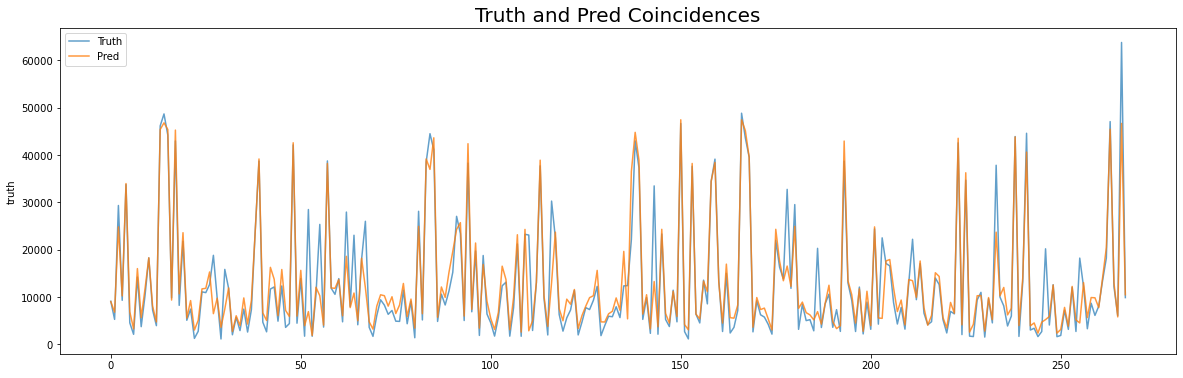

In [34]:
plt.figure(figsize=(20,6))
_ = sns.lineplot(result.index, result['truth'], alpha=0.7, label='Truth')
_ = sns.lineplot(result.index, result['pred'], alpha=0.8, label='Pred')
plt.title('Truth and Pred Coincidences',size=20)
plt.legend()
plt.show()

----

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df['children'] = df['children'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [8]:
X = df.drop('charges', axis=1)
X.head(2)

,age,sex,bmi,children,smoker,region
0,19,female,27.90,0,yes,southwest
1,18,male,33.77,1,no,southeast


In [9]:
y = df['charges']
y.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [10]:
X_ohe = pd.get_dummies(X)
X_ohe.head(2)

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.77,0,1,0,1,0,0,0,0,1,0,0,0,1,0


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ohe)
X_scaled.shape


(1338, 16)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, shuffle=True, test_size=0.2, random_state=42)


In [14]:
X_train.shape, y_train.shape

((1070, 16), (1070,))

In [15]:
X_test.shape, y_test.shape

((268, 16), (268,))

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, shuffle=True, test_size=0.2, random_state=42)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
import time

lgbm_clf = LGBMRegressor(n_estimators=300)
evals = [(X_valid, y_valid)]


param_grid = {
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'max_depth': [5, 6, 7, 8, 9, 10]
}

grid_cv = GridSearchCV(lgbm_clf, cv=3, refit=True, param_grid=param_grid, verbose=10)
grid_cv.fit(X_train, y_train, early_stopping_rounds=50,
            eval_metric='rmse', eval_set=evals)


In [18]:
best = grid_cv.best_estimator_
best

LGBMRegressor(max_depth=5, n_estimators=300, subsample=0.7)

In [20]:
grid_cv.best_score_

0.8565134177477912

In [21]:
best.feature_importances_

array([209, 186,  28,   0,  26,  11,   8,   3,   0,   0,  27,   0,  15,
         5,   7,  11], dtype=int32)

In [22]:
y_predict = best.predict(X_test)
y_predict[:5]

array([ 8620.42828881,  6999.82434717, 24745.80566508,  9499.49781255,
       33772.15230223])

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)
mse

20007491.591187134

In [24]:
mse ** 0.5


4472.973461936381

In [25]:
truth = y_test.to_frame().rename(columns={'charges':'truth'}).reset_index(drop=True)
truth

,truth
0,9095.06825
1,5272.17580
2,29330.98315
3,9301.89355
4,33750.29180
...,...
263,47055.53210
264,12222.89830
265,6067.12675
266,63770.42801


In [26]:
pred = pd.DataFrame({'pred': y_predict})
pred

,pred
0,8620.428289
1,6999.824347
2,24745.805665
3,9499.497813
4,33772.152302
...,...
263,44614.226009
264,12811.431120
265,6498.649523
266,45712.059840


In [27]:
result = pd.concat([truth, pred], axis=1)
result

,truth,pred
0,9095.06825,8620.428289
1,5272.17580,6999.824347
2,29330.98315,24745.805665
3,9301.89355,9499.497813
4,33750.29180,33772.152302
...,...,...
263,47055.53210,44614.226009
264,12222.89830,12811.431120
265,6067.12675,6498.649523
266,63770.42801,45712.059840


In [28]:
result['error'] = np.round(np.abs(result['truth'] - result['pred']), 4)
result

,truth,pred,error
0,9095.06825,8620.428289,474.6400
1,5272.17580,6999.824347,1727.6485
2,29330.98315,24745.805665,4585.1775
3,9301.89355,9499.497813,197.6043
4,33750.29180,33772.152302,21.8605
...,...,...,...
263,47055.53210,44614.226009,2441.3061
264,12222.89830,12811.431120,588.5328
265,6067.12675,6498.649523,431.5228
266,63770.42801,45712.059840,18058.3682


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


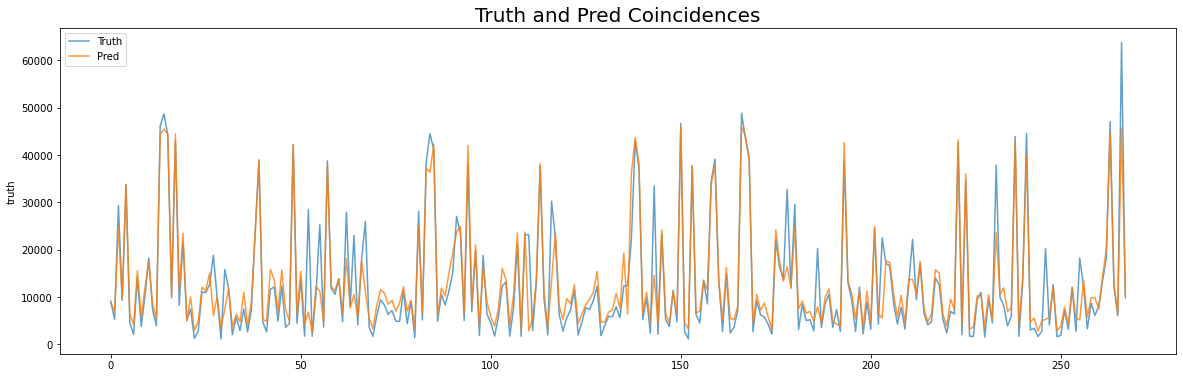

In [29]:
plt.figure(figsize=(20,6))
_ = sns.lineplot(result.index, result['truth'], alpha=0.7, label='Truth')
_ = sns.lineplot(result.index, result['pred'], alpha=0.8, label='Pred')
plt.title('Truth and Pred Coincidences',size=20)
plt.legend()
plt.show()

-----

In [30]:
import lightgbm as lgb

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [34]:
train_dataset = lgb.Dataset(X_train, y_train)
train_dataset

In [35]:
test_dataset = lgb.Dataset(X_test, y_test)
test_dataset

In [53]:
# LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7)

params = {
    'learning_rate': 0.3,
    'objective': 'regression',
    'metric':'rmse',
    'seed':42,
    'max_depth': 5,
    'n_estimators': 300,
    'subsample':0.7
}

In [ ]:
lgb_model = lgb.train(
    params, train_dataset, 10000, test_dataset,
    verbose_eval=500, early_stopping_rounds=100
)
lgb_model

In [55]:
y_predict = lgb_model.predict(X_test)
y_predict[:5]

array([ 8518.39798094,  6812.64479503, 25992.23172786,  9181.32613958,
       34030.0905746 ])

In [56]:
mse = mean_squared_error(y_test, y_predict)
mse

19890052.785744432

In [57]:
# 4448.543875541444
mse ** 0.5

4459.82654211399

In [58]:
lgb_model.best_score

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('rmse', 4459.82654666785)])})

In [59]:
truth = y_test.to_frame().rename(columns={'charges':'truth'}).reset_index(drop=True)
truth

,truth
0,9095.06825
1,5272.17580
2,29330.98315
3,9301.89355
4,33750.29180
...,...
263,47055.53210
264,12222.89830
265,6067.12675
266,63770.42801


In [60]:
pred = pd.DataFrame({'pred': y_predict})
pred

,pred
0,8518.397981
1,6812.644795
2,25992.231728
3,9181.326140
4,34030.090575
...,...
263,46121.431270
264,12930.699758
265,6804.172183
266,46671.498692


In [61]:
result = pd.concat([truth, pred], axis=1)
result

,truth,pred
0,9095.06825,8518.397981
1,5272.17580,6812.644795
2,29330.98315,25992.231728
3,9301.89355,9181.326140
4,33750.29180,34030.090575
...,...,...
263,47055.53210,46121.431270
264,12222.89830,12930.699758
265,6067.12675,6804.172183
266,63770.42801,46671.498692


In [62]:
result['error'] = np.round(np.abs(result['truth'] - result['pred']), 4)
result

,truth,pred,error
0,9095.06825,8518.397981,576.6703
1,5272.17580,6812.644795,1540.4690
2,29330.98315,25992.231728,3338.7514
3,9301.89355,9181.326140,120.5674
4,33750.29180,34030.090575,279.7988
...,...,...,...
263,47055.53210,46121.431270,934.1008
264,12222.89830,12930.699758,707.8015
265,6067.12675,6804.172183,737.0454
266,63770.42801,46671.498692,17098.9293


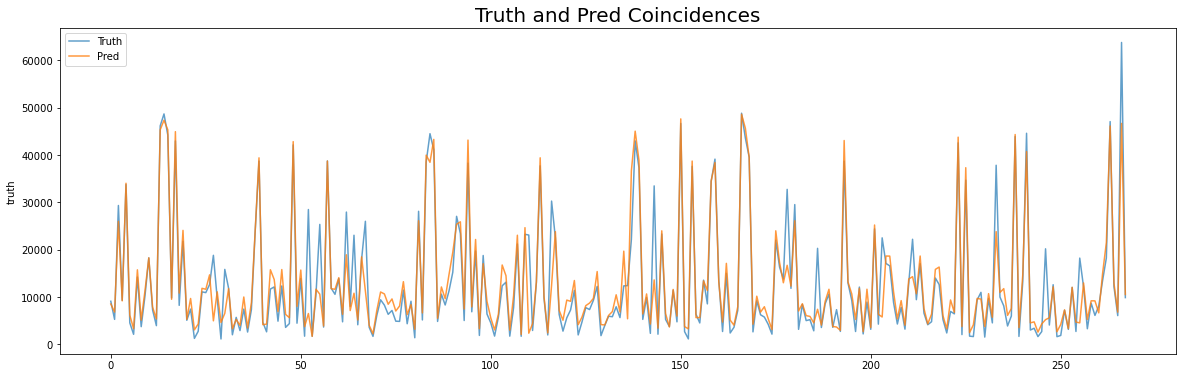

In [64]:
plt.figure(figsize=(20,6))
_ = sns.lineplot(result.index, result['truth'], alpha=0.7, label='Truth')
_ = sns.lineplot(result.index, result['pred'], alpha=0.8, label='Pred')
plt.title('Truth and Pred Coincidences',size=20)
plt.legend()
plt.show()

----

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [67]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [72]:
feature_names = [
    'age', 'bmi', 'smoker',
]
label_name = 'charges'
feature_names, label_name

(['age', 'bmi', 'smoker'], 'charges')

In [70]:
X = df[feature_names]
X

,age,bmi,smoker
0,19,27.900,yes
1,18,33.770,no
2,28,33.000,no
3,33,22.705,no
4,32,28.880,no
...,...,...,...
1333,50,30.970,no
1334,18,31.920,no
1335,18,36.850,no
1336,21,25.800,no


In [73]:
y = df[label_name]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [95]:
X_ohe = pd.get_dummies(X)
X_ohe

,age,bmi,smoker_no,smoker_yes
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,1,0
3,33,22.705,1,0
4,32,28.880,1,0
...,...,...,...,...
1333,50,30.970,1,0
1334,18,31.920,1,0
1335,18,36.850,1,0
1336,21,25.800,1,0


In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ohe)
X_scaled.shape


(1338, 4)

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_ohe, y, shuffle=True, test_size=0.2, random_state=42)


In [105]:
train_dataset = lgb.Dataset(X_train, y_train)
train_dataset

In [106]:
test_dataset = lgb.Dataset(X_test, y_test)
test_dataset

In [107]:
# LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7)

params = {
    'learning_rate': 0.3,
    'objective': 'regression',
    'metric':'rmse',
    'seed':42,
    'max_depth': 5,
    'n_estimators': 300,
    'subsample':0.7
}

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
import time

# lgb_model = lgb.train(
#     params, train_dataset, 10000, test_dataset,
#     verbose_eval=500, early_stopping_rounds=100
# )
lgbm_clf = LGBMRegressor(n_estimators=300)
evals = [(X_valid, y_valid)]


param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 0.8, 0.9],
    'max_depth': [4, 5, 6, 7, 8, 9, 10]
}

grid_cv = GridSearchCV(lgbm_clf, cv=3, refit=True,
                       param_grid=param_grid, verbose=10)
grid_cv.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric='rmse', eval_set=evals, )


In [120]:
grid_cv.best_estimator_

LGBMRegressor(learning_rate=0.3, max_depth=4, n_estimators=300, subsample=0.5)

In [121]:
grid_cv.best_score_

0.43365485559504185

In [122]:
best_model =  grid_cv.best_estimator_
best_model

LGBMRegressor(learning_rate=0.3, max_depth=4, n_estimators=300, subsample=0.5)

In [123]:
y_predict = best_model.predict(X_test)
y_predict[:5]

array([12541.06764444, 11476.44488723, 17487.8975256 , 12541.06764444,
       19816.9308903 ])

In [124]:
mse = mean_squared_error(y_test, y_predict)
mse

86274693.4626965

In [125]:
# 4448.543875541444
mse ** 0.5

9288.417166702651

In [126]:
lgb_model.best_score

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('rmse', 4456.516682466685)])})

In [113]:
truth = y_test.to_frame().rename(columns={'charges':'truth'}).reset_index(drop=True)
truth

,truth
0,9095.06825
1,5272.17580
2,29330.98315
3,9301.89355
4,33750.29180
...,...
263,47055.53210
264,12222.89830
265,6067.12675
266,63770.42801


In [114]:
pred = pd.DataFrame({'pred': y_predict})
pred

,pred
0,9350.483096
1,7221.228710
2,26693.903058
3,9350.483096
4,34216.304075
...,...
263,46339.924901
264,11893.010552
265,6818.291044
266,46867.189661


In [115]:
result = pd.concat([truth, pred], axis=1)
result

,truth,pred
0,9095.06825,9350.483096
1,5272.17580,7221.228710
2,29330.98315,26693.903058
3,9301.89355,9350.483096
4,33750.29180,34216.304075
...,...,...
263,47055.53210,46339.924901
264,12222.89830,11893.010552
265,6067.12675,6818.291044
266,63770.42801,46867.189661


In [116]:
result['error'] = np.round(np.abs(result['truth'] - result['pred']), 4)
result

,truth,pred,error
0,9095.06825,9350.483096,255.4148
1,5272.17580,7221.228710,1949.0529
2,29330.98315,26693.903058,2637.0801
3,9301.89355,9350.483096,48.5895
4,33750.29180,34216.304075,466.0123
...,...,...,...
263,47055.53210,46339.924901,715.6072
264,12222.89830,11893.010552,329.8877
265,6067.12675,6818.291044,751.1643
266,63770.42801,46867.189661,16903.2383


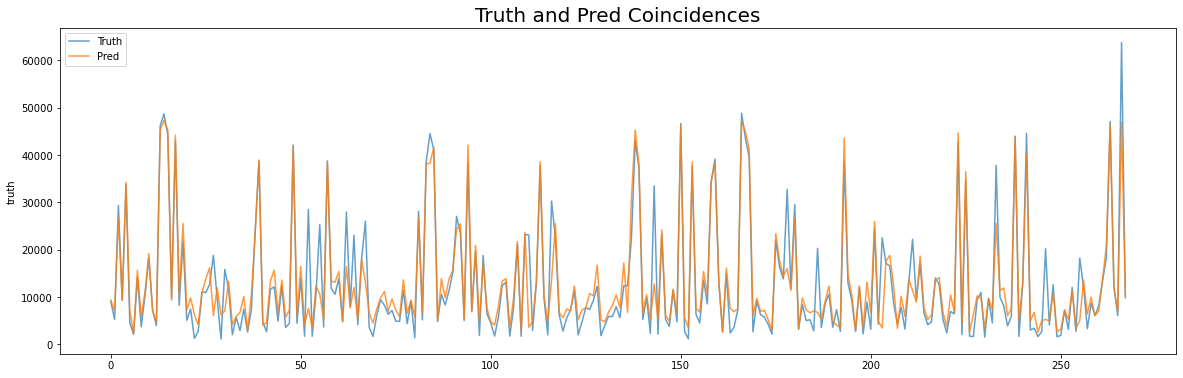

In [117]:
plt.figure(figsize=(20,6))
_ = sns.lineplot(result.index, result['truth'], alpha=0.7, label='Truth')
_ = sns.lineplot(result.index, result['pred'], alpha=0.8, label='Pred')
plt.title('Truth and Pred Coincidences',size=20)
plt.legend()
plt.show()

---

In [ ]:
# mse : 19789542.6126
# rmse : 4448.5439
# r2_score : 0.8725

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMRegressor(n_estimators=300)

param_grid = {
    'learning_rate': [0.1, 0.2, 0.25, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'max_depth': [5, 6, 7, 8, 9, 10,]
}

grid_cv = GridSearchCV(lgbm_clf, cv=3, refit=True, param_grid=param_grid)
grid_cv.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=LGBMRegressor(n_estimators=300),
             param_grid={'learning_rate': [0.1, 0.2, 0.25, 0.3],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'subsample': [0.7, 0.8, 0.9]})

In [ ]:
# rmse 4540 score 0.8577
# LGBMRegressor(learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7)

# rmse 4481.30892812165 score 0.8547726961768637
# LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7)

best_model = grid_cv.best_estimator_
best_model

LGBMRegressor(max_depth=5, n_estimators=300, subsample=0.7)

In [ ]:
grid_cv.best_score_

0.8221814362484846

In [ ]:
pd.DataFrame(grid_cv.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.680630,0.083548,0.003819,0.001093,0.1,5,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'subsam...",0.849572,0.811958,0.805014,0.822181,0.019574,1
1,1.687791,0.084761,0.002844,0.000215,0.1,5,0.8,"{'learning_rate': 0.1, 'max_depth': 5, 'subsam...",0.849572,0.811958,0.805014,0.822181,0.019574,1
2,1.670854,0.041976,0.003673,0.000029,0.1,5,0.9,"{'learning_rate': 0.1, 'max_depth': 5, 'subsam...",0.849572,0.811958,0.805014,0.822181,0.019574,1
3,2.024444,0.166726,0.003909,0.000265,0.1,6,0.7,"{'learning_rate': 0.1, 'max_depth': 6, 'subsam...",0.845546,0.808026,0.800830,0.818134,0.019604,4
4,1.963600,0.092353,0.004349,0.000286,0.1,6,0.8,"{'learning_rate': 0.1, 'max_depth': 6, 'subsam...",0.845546,0.808026,0.800830,0.818134,0.019604,4
5,1.954152,0.091703,0.003821,0.000259,0.1,6,0.9,"{'learning_rate': 0.1, 'max_depth': 6, 'subsam...",0.845546,0.808026,0.800830,0.818134,0.019604,4
6,2.279311,0.046859,0.003514,0.000442,0.1,7,0.7,"{'learning_rate': 0.1, 'max_depth': 7, 'subsam...",0.842820,0.805214,0.797383,0.815139,0.019833,7
7,2.303670,0.167256,0.003425,0.000286,0.1,7,0.8,"{'learning_rate': 0.1, 'max_depth': 7, 'subsam...",0.842820,0.805214,0.797383,0.815139,0.019833,7
8,2.317169,0.187929,0.003623,0.000296,0.1,7,0.9,"{'learning_rate': 0.1, 'max_depth': 7, 'subsam...",0.842820,0.805214,0.797383,0.815139,0.019833,7
11,3.092580,0.124758,0.003674,0.000047,0.1,8,0.9,"{'learning_rate': 0.1, 'max_depth': 8, 'subsam...",0.841884,0.803141,0.796669,0.813898,0.019965,10


In [ ]:
y_predict = best_model.predict(X_test)
y_predict[:5]

array([ 9857.86238374,  5904.8269035 , 30268.46970807,  8780.48487379,
       31840.44237577])

---

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


lgbm_clf = LGBMRegressor()
evals = [(X_valid, y_valid)]

param_distributions = {
    'n_estimators': np.random.randint(100, 1000, 100),
    'learning_rate': np.random.uniform(0.15, 0.3, 10),
    'subsample': np.random.uniform(0.7, 0.9, 5),
    'max_depth': [5, 6, 7, 8, 9, 10]
}

rd_cv = RandomizedSearchCV(
    lgbm_clf,
    param_distributions=param_distributions,
    n_iter=5, cv=4,
    n_jobs=-1
)

rd_cv.fit(X_train, y_train, eval_metric='rmse')


RandomizedSearchCV(cv=4, estimator=LGBMRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.16952882, 0.29875539, 0.25128317, 0.25559426, 0.21907387,
       0.28290445, 0.16008881, 0.18675961, 0.25152537, 0.28481887]),
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'n_estimators': array([811, 235, 806, 562, 146, 726, 383, 651, 125, 727, 646, 198, 753,
       924, 887, 513, 566, 726, 575,...
       452, 256, 506, 141, 678, 878, 100, 273, 454, 994, 182, 866, 407,
       155, 851, 480, 172, 136, 333, 137, 987, 802, 161, 838, 597, 990,
       485, 328, 770, 347, 872, 102, 123, 378, 807, 510, 347, 529, 834,
       410, 824, 830, 261, 248, 214, 299, 788, 436, 233, 569, 950, 829,
       972, 223, 684, 648, 976, 152, 431, 655, 732, 166, 228, 390, 313,
       433, 843, 231, 527, 246, 524, 938, 889, 394]),
                                        'subsample': array([0.86183237, 0.8213

In [ ]:
best_model = rd_cv.best_estimator_
best_model

LGBMRegressor(learning_rate=0.16008881209685186, max_depth=9, n_estimators=347,
              subsample=0.8618323659944092)

In [ ]:
rd_cv.best_score_

0.801204155811672

In [ ]:
pd.DataFrame(rd_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.077673,0.025467,0.004017,0.001188,0.872227,285,5,0.268542,"{'subsample': 0.8722265597478588, 'n_estimator...",0.807945,0.836549,0.775739,0.813906,0.808535,0.021735,2
1,0.118065,0.023016,0.004390,0.000241,0.872227,290,6,0.262793,"{'subsample': 0.8722265597478588, 'n_estimator...",0.809072,0.831987,0.767205,0.803915,0.803045,0.023234,4
2,0.073821,0.010007,0.004384,0.000440,0.824598,175,9,0.174301,"{'subsample': 0.8245979193926237, 'n_estimator...",0.816227,0.841830,0.780675,0.820699,0.814858,0.021977,1
3,0.419424,0.010668,0.023061,0.000498,0.758191,959,9,0.268542,"{'subsample': 0.7581913091382002, 'n_estimator...",0.782986,0.811372,0.713419,0.759091,0.766717,0.035908,5
4,0.129640,0.014943,0.006487,0.000054,0.872227,285,9,0.174301,"{'subsample': 0.8722265597478588, 'n_estimator...",0.807593,0.833147,0.765751,0.806660,0.803288,0.024138,3


In [ ]:
y_predict = best_model.predict(X_test)
y_predict[:5]

array([ 8595.26436839,  4015.04644003, 26651.1592598 ,  9361.66502258,
       32637.99076311])